# Calculus and Differential Equations
- Working with polynomials and calculus
- Differentiating and integrating symbolically using SymPy
- Solving equations
- Integrating functions numerically using SciPy
- Solving simple differential equations numerically
- Solving systems of differential equations
- Solving partial differential equations numerically
- Using discrete Fourier transforms for signal processing.

## Working with polynomials and Calculus

In [1]:
class Polynomial:
    """Basic polynomial class"""

    def __init__(self, coeffs):
        self.coeffs = coeffs

    def __repr__(self):
        return f"Polynomial({repr(self.coeffs)})"

    def __call__(self, x) -> int:
        return sum([coeff*x**i for i, coeff in enumerate(self.coeffs)])

    def differentiate(self):
        """Differentiate the polynomial and return a new polynomial"""
        return Polynomial([i*coeff for i, coeff in enumerate(self.coeffs[1:], start=1)])

    def integrate(self):
        """Integrate the polynomial and return a new polynomial"""
        return Polynomial([coeff/i for i, coeff in enumerate(self.coeffs, start=1)])


In [2]:
p = Polynomial([1, -2, 1])
diff = p.differentiate()
print(diff)

integ = p.integrate()
print(integ)

Polynomial([-2, 2])
Polynomial([1.0, -1.0, 0.3333333333333333])


## Differentiating and integrating symbolically using SymPy

In [3]:
# Symbolic calculation: The most basic use case of sympy is to perform symbolic calculations. For example, finding the value of a mathematical expression:
import sympy

x = sympy.Symbol('x')
y = sympy.Symbol('y')

expr = x + 2 * y

print(f"Expression: {expr}")
print(f"Value of expression for x=1 and y=2: {expr.evalf(subs={x:1, y:2})}")


Expression: x + 2*y
Value of expression for x=1 and y=2: 5.00000000000000


In [4]:
# Simplification: sympy can also simplify mathematical expressions:


expr = (x + y) ** 2

print(f"Expression: {expr}")
print(f"Simplified expression: {sympy.simplify(expr)}")


Expression: (x + y)**2
Simplified expression: (x + y)**2


In [5]:
# Solving equations: Another important use case of sympy is to solve equations. For example:
expr = x ** 2 - 4 * x + 4

print(f"Expression: {expr}")
print(f"Roots of the equation: {sympy.solve(expr)}")

Expression: x**2 - 4*x + 4
Roots of the equation: [2]


In [6]:
# Differentiation: sympy can also perform differentiation. For example, to find the derivative of a function:
expr = x ** 2 + y ** 2

print(f"Expression: {expr}")
print(f"Derivative with respect to x: {sympy.diff(expr, x)}")
print(f"Derivative with respect to y: {sympy.diff(expr, y)}")


Expression: x**2 + y**2
Derivative with respect to x: 2*x
Derivative with respect to y: 2*y


In [7]:
# Integration: sympy can perform symbolic integration:
expr = x ** 2

print(f"Expression: {expr}")
print(f"Antiderivative of the expression: {sympy.integrate(expr, x)}")


Expression: x**2
Antiderivative of the expression: x**3/3


In [8]:
# Define a function
f = x**3 + 2*x**2 + x + 1

# Find the definite integral of the function
a, b = 0, 1
integral = sympy.integrate(f, (x, a, b))
print(integral)


29/12


In [9]:
# Solving a system of linear equations

# Define the system of linear equations
eq1 = sympy.Eq(x + y, 4)
eq2 = sympy.Eq(x - y, 2)

# Solve the system of linear equations
sol = sympy.solve((eq1, eq2), (x, y))
print(sol)


{x: 3, y: 1}


## Solving equations

In [16]:
from scipy import optimize
from math import exp


def f(x):
    return x*(x-2)*exp(3-x)


def fp(x):
    return -(x**2 - 4*x + 2) * exp(3 - x)


print(optimize.newton(f, 1, fprime=fp))
print(optimize.newton(f, 1., x1=1.5))


2.0
1.9999999999999862


In [17]:
from math import copysign


def bisect(f, a, b, tol=1e-5):
    """Bisection method for root finding"""
    fa, fb = f(a), f(b)
    assert not copysign(fa, fb) == fa, "Function must change signs"
    while (b-a) > tol:
        m = (b-a)/2
        fm = f(m)
        if fm == 0:
            return m
        if copysign(fm, fa) == fm:
            a = m
            fa = fm
        else:
            b = m
        return a


In [18]:
optimize.brentq(f, 1.0, 3.0)


1.9999999999998792

## Integrating functions numerically using SciPy

In [19]:
from scipy import integrate

In [20]:
import numpy as np

def erf_integrand(t):
   return np.exp(-t**2)

In [22]:
val_quad, err_quad = integrate.quad(erf_integrand, -1.0, 1.0)
print(val_quad, err_quad)


1.493648265624854 1.6582826951881447e-14


In [23]:
val_quad, err_quad = integrate.quadrature(erf_integrand, -1.0, 1.0)
print(val_quad, err_quad)

1.4936482656450036 7.459892703565174e-10


## Solving simple differential equations numerically

In [24]:
def f(t, y):
    return -0.2*y


t_range = (0, 5)
T0 = np.array([50.])


def true_solution(t):
    return 50. * np.exp(-0.2*t)


Text(0.5, 1.0, 'Error in approximation')

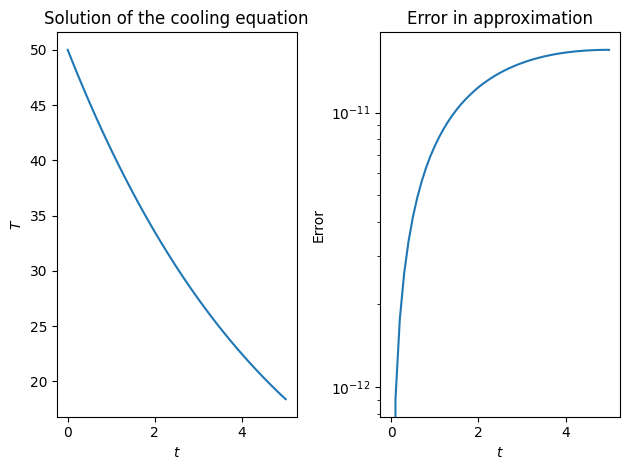

In [28]:
sol = integrate.solve_ivp(f, t_range, T0, max_step= 0.1)

t_vals = sol.t 
T_vals = sol.y[0,:]

import matplotlib.pyplot as plt  
fig, (ax1, ax2) = plt.subplots(1,2, tight_layout=True)
ax1.plot(t_vals, T_vals)
ax1.set_xlabel("$t$")
ax1.set_ylabel("$T$")
ax1.set_title("Solution of the cooling equation")

err = np.abs(T_vals - true_solution(t_vals))

ax2.semilogy(t_vals, err)
ax2.set_xlabel("$t$")
ax2.set_ylabel("Error")
ax2.set_title("Error in approximation")

## Solving systems of differential equations

## Solving partial differential equations numerically

## Using discrete Fourier transforms for signal processing.